<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/8_Aprendizaje_Estadistico/Maldicion_Dimension.ipynb"><img src='https://colab.research.google.com/assets/colab-badge.svg'/></a>

# Maldición de la dimensión

Este término fue usado por primera vez por Richard Bellman en la introducción de su libro "Dynamic Programming" en 1957:


*Todos los problemas que se deben a la gran dimensión deben ser incluidos bajo el encabeazdo "Maldición de la Dimensión". Como esto es una maldición, ..., no hay necesidad de sentirse desanimado sobre obtener resultados significativos a pesar de ello.*

Hablaba de este término para referirse a las dificultades de encontrar un óptimo, en un espacio de alta dimensión, de modo exhaustivo.

# Dependencias

In [ ]:
import numpy as np
import math

import matplotlib.pyplot as plt

In [ ]:
np.random.seed(1)

# Problemas

## Clasificación

<center> <img src='https://github.com/MaxMitre/Teoria_Estadistica/blob/main/semana1/img/vecinos.jpg?raw=true' width=500> </center>

Para clasificar un elemento podemos utilizar a sus vecinos como referencia para algún clasificador.

## Regresión

<center> <img src='https://github.com/MaxMitre/Teoria_Estadistica/blob/main/semana1/img/regresion.jpg?raw=true' width=600> </center>

Para predecir el valor de un punto podemos ver el valor de sus vecinos y utilizar dicha información como apoyo.

Los procesos arriba mencionados tiene sentido en dimensiones pequeñas.

- ¿Que dimensión tienen ambos casos mencionados arriba?

# Espacios de alta dimensión

Si los datos viven en $[0,1]^p$, para tomar un vecindario que represente un porcentaje $s$ del volumen del hipercubo, necesitamos que el lado de dicha vecindad mida $s^{1/p}$

- $s = 0.1$, $p=10$, $s^{1/p} = 0.8$ 
- $s = 0.01$, $p=10$, $s^{1/p} = 0.63$

In [ ]:
# Distintas dimensiones a comparar
p = [1,2,3,10]

vol_fractions = np.linspace(0,1,101)

dist_p1 = vol_fractions**(1/p[0])
dist_p2 = vol_fractions**(1/p[1])
dist_p3 = vol_fractions**(1/p[2])
dist_p10 = vol_fractions**(1/p[3])

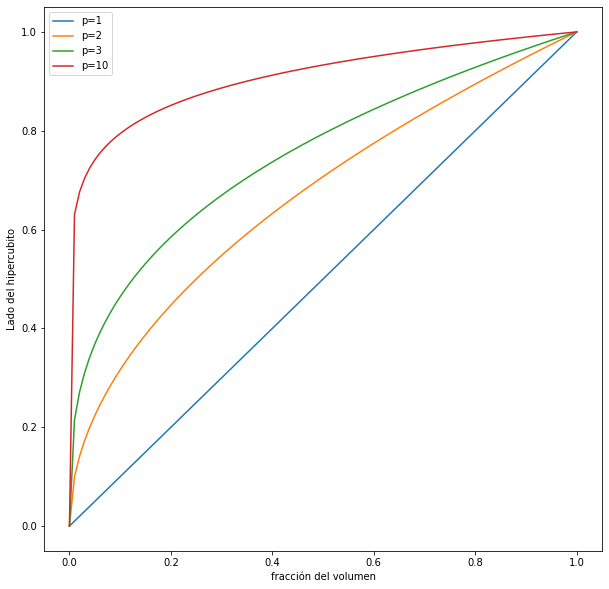

In [ ]:
plt.figure(figsize=(10,10))

plt.plot(vol_fractions, dist_p1, label='p=1')
plt.plot(vol_fractions, dist_p2, label='p=2')
plt.plot(vol_fractions, dist_p3, label='p=3')
plt.plot(vol_fractions, dist_p10, label='p=10')

plt.ylabel('Lado del hipercubito')
plt.xlabel('fracción del volumen')

plt.legend()

¿Que interpretación tiene la gráfica anterior?
- Comenten

# ¿Como superar eso?

<center> <img src='https://github.com/MaxMitre/Teoria_Estadistica/blob/main/semana1/img/muestras.jpg?raw=true' width=600> </center>

# Cubriendo $ A=[0,1]^{p}$

Utilizaremos esferas unitarias para cubrir el espacio $A$.

Recordemos que el volumen de una espera de dimensión $p$ se calcula como:

$V_p(r) = r^p \dfrac{\pi^{p/2}}{\Gamma(p/2 + 1)}$

In [ ]:
values_p = [i for i in range(0,101)]

vol_p = [(1**p)*(np.pi**(p/2)/(math.gamma(p/2 + 1))) for p in values_p]

¿Se entiende la linea anterior?

Text(0.5, 1.0, 'Volumen dada la dimensión')

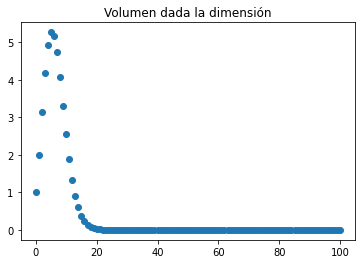

In [ ]:
plt.scatter(values_p, vol_p)

plt.title('Volumen dada la dimensión')

Text(0.5, 1.0, 'Volumen dada la dimensión')

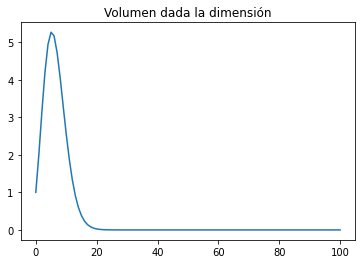

In [ ]:
plt.plot(values_p, vol_p)

plt.title('Volumen dada la dimensión')

¿Cuantas esferas unitarias (de dimensión $p$) se necesitan para cubrir $A$?

Una cantidad $n$, donde

$ n\geqslant \dfrac{1}{V_p(1)} = \dfrac{\Gamma(p/2 + 1)}{\pi^{p/2}} $

In [ ]:
cant_p1 = math.gamma(1.5)/(np.pi**0.5)
cant_p1

0.5000000000000001

In [ ]:
cant_p10 = math.gamma(11)/(np.pi**10)
cant_p10

38.74933965843515

In [ ]:
cant_p100 = math.gamma(51)/(np.pi**50)
cant_p100

4.2226125853234993e+39

Para algunas dimensiones, podemos visualizar el número de esferas necesarias

In [ ]:
# Cambiando el rango podemos observar para diferentes casos, recomendados p=20, p=10, p=15
values_p = [i for i in range(0,20)]

number_sph = [ math.gamma(p/2 + 1)/(np.pi**(p/2)) for p in values_p]

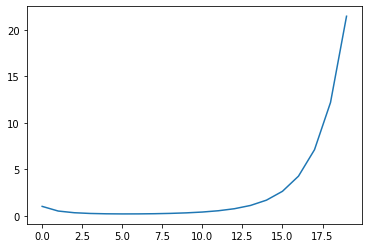

In [ ]:
plt.plot(values_p, number_sph)

# Volumen de cascarones

La probabilidad de que una variable aleatoria uniforme pertenezca al espacio entre el hipercubo $[0, 0.9]^p$ y el $[0, 1]^p$ es

$$ 1 - 0.9^p \longrightarrow 1 \text{  cuando } p→ ∞$$ 

In [ ]:
values_p = [i for i in range(0,101)]

probability = [1 - 0.9**p for p in values_p]

Text(0, 0.5, 'Probabilidad')

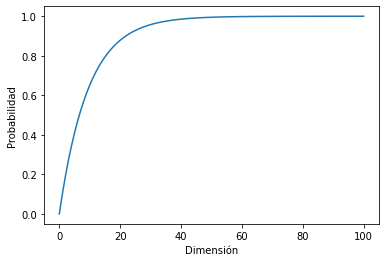

In [ ]:
plt.plot(values_p, probability)
plt.xlabel('Dimensión')
plt.ylabel('Probabilidad')

# ¿Como evitar problemas con las dimensiones?

- Reducción de dimensión
  - PCA
  - Reducir datos usando correlación

- Regularización
  - Parámetros

- Restringir el modelo


# Referencias

https://mathematical-coffees.github.io/slides/mc08-delon.pdf

https://juanitorduz.github.io/exploring-the-curse-of-dimensionality-part-i./